In [1]:
from dataset_utils import create_amazon_category_metadata, create_amazon_category
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

INFO: Pandarallel will run on 28 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Specify the category and the path to download the dataset
###### The list of categories can be found in AmazonCategoryMetadata.py

In [2]:
category = 'clothing_shoes_jewellery'
path_to_download = r"/home/abhinav/amazon_dataset"

### Create category to explore the data

In [3]:
amazon_category = create_amazon_category(create_amazon_category_metadata(),
                                         category,
                                         path_to_download)

### Download the images(only if you want to visualize it). 
###### This will take ~ 15 mins

In [ ]:
#amazon_category.download_images(num_of_workers=64)

### Product data

In [4]:
product_df = amazon_category.product_df
amazon_category.product_df.head()

,asin,title,price,imUrl,brand,description,categories,category,also_viewed,also_bought,bought_together
0,0000031887,Ballet Dress-Up Fairy Tutu,6.79,http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,This adorable basic ballerina tutu is perfect ...,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",clothing_shoes_jewellery,"[B00538F5OK, B003AVKOP2, B008F0SU0Y, B002GZPTR...","[B003AVKOP2, B00D103F8U, B008F0SU0Y, B003AVEU6...",[]
1,0000037214,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,6.99,http://ecx.images-amazon.com/images/I/31mCncNu...,Big Dreams,NaN,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...",clothing_shoes_jewellery,[B00JO8II76],NaN,NaN
2,0123456479,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,64.98,http://ecx.images-amazon.com/images/I/413tGhqo...,NaN,Elegance par excellence. Hand-crafted of the f...,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",clothing_shoes_jewellery,"[B0006JCGUM, B000BMTCK6, B00194Q262, B00AMX5QR...","[B000BMTCK6, B0006JCGUM, B00194Q262, B000P4DEY...","[B000BMTCK6, B0006JCGUM]"
3,0456787283,FX1 Small Adult Aviator Sunglasses with Silver...,NaN,http://ecx.images-amazon.com/images/I/31dS6eGu...,NaN,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",clothing_shoes_jewellery,"[B008MNVR4K, B008MNVQFA, B00703LLW6, B001UG16JC]",NaN,NaN
4,0456808574,Lantin White Visor Wrap Around Ski Style Aviat...,NaN,http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",clothing_shoes_jewellery,[B003T1CFF0],NaN,NaN


In [21]:
product_df[['asin', 'also_viewed']].head().explode('also_viewed')

,asin,also_viewed
0,0000031887,B00538F5OK
0,0000031887,B003AVKOP2
0,0000031887,B008F0SU0Y
0,0000031887,B002GZPTRQ
0,0000031887,B002GZGI4E
...,...,...
3,0456787283,B008MNVR4K
3,0456787283,B008MNVQFA
3,0456787283,B00703LLW6
3,0456787283,B001UG16JC


### Review data(Users)

In [5]:
review_df = amazon_category.review_df
review_df.head()

,overall,reviewerID,asin,date,helpfulness_ratio
0,5,A2XVJBSRI3SWDI,0000031887,2013-11-04,0.0
1,2,A2R3K1KX09QBYP,0000031887,2013-02-17,1.0
2,1,A19PBP93OF896,0000031887,2013-03-21,0.0
3,4,A1P0IHU93EF9ZK,0000031887,2014-01-23,0.0
4,5,A2G5TCU2WDFZ65,0000031887,2013-01-19,0.0


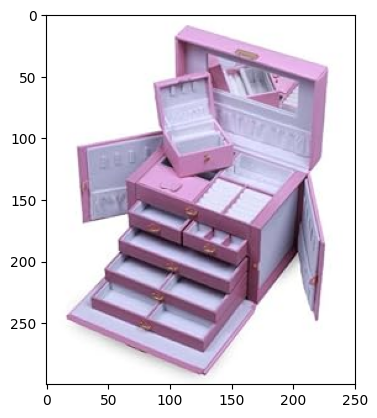

In [12]:
np.random.seed(40)
product = amazon_category.get_product('0123456479')
image_path = product.get_image_path()
plt.imshow(plt.imread(image_path))

#### Display also viewed images

Number of valid products: 51
0: Product id: B00AMX599W
1: Product id: B0046V6ASU
2: Product id: B000VB35BY
3: Product id: B0049H5BBI
4: Product id: B005MF9ULS
5: Product id: B00I828AWW
6: Product id: B003UJK8ZA
7: Product id: B00FJF58PS
8: Product id: B005TVIJP8
9: Product id: B001MX958W


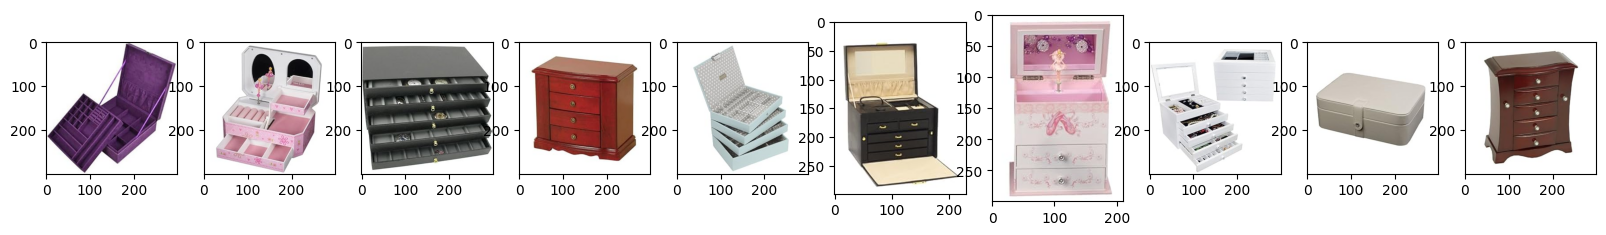

In [18]:
# Display an array of images
def plot_products(product_ids, max_products=10):
    product_ids = list(filter(lambda x: amazon_category.is_valid_product(x), product_ids))
    product_ids = list(filter(lambda x: os.path.exists(amazon_category.get_product(x).get_image_path()), product_ids))
    print("Number of valid products: {}".format(len(product_ids)))
    if len(product_ids) > max_products:
        product_ids = np.random.choice(product_ids,max_products, replace=False)
        
    plt.figure(figsize=(20, 20))
    
    for i, product_id in enumerate(product_ids):
        print(f"{i}: Product id: {product_id}")
        product = amazon_category.get_product(product_id)
        plt.subplot(1, len(product_id), i + 1)
        plt.imshow(plt.imread(product.get_image_path()))
        
plot_products(product.get_also_viewed())

### Display also bought images

Number of valid products: 7
0: Product id: B000BMTCK6
1: Product id: B0006JCGUM
2: Product id: B00194Q262
3: Product id: B000P4DEYU
4: Product id: B000OJRPEQ
5: Product id: B0046V2HKK
6: Product id: B007Q1VH26


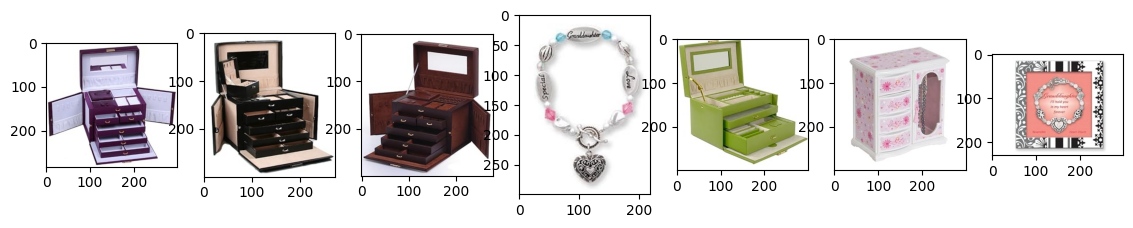

In [19]:
plot_products(product.get_also_bought())

### Display bought together images

Number of valid products: 2
0: Product id: B000BMTCK6
1: Product id: B0006JCGUM


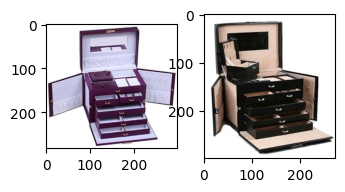

In [20]:
plot_products(product.get_bought_together())